## Movie Recommendation System




## Step 1 Importing all the libraries

In [1]:
# Imporing libraries

import numpy as np
import pandas as pd
import warnings


In [2]:
# Filtering all the warning

warnings.filterwarnings('ignore')

In [8]:
## Get the data

columns_names = ['user_id', 'item_id','rating','timestamp']
df = pd.read_csv('ml-100k/ml-100k/u.data', sep="\t", names = columns_names)


In [9]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
df.shape

(100000, 4)

In [11]:
# get the unique users
df['user_id'].nunique()

943

In [12]:
# Get the unique movies
df['item_id'].nunique()

1682

In [21]:
# Read u.item
movies_titles = pd.read_csv('ml-100k/ml-100k/u.item',  encoding = "ISO-8859-1",sep="\|", header = None)


In [22]:
movies_titles.shape

(1682, 24)

In [27]:
movies_titles = movies_titles[[0,1]]

movies_titles.columns = ['item_id', 'title']

In [28]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [29]:
# Merging the two dataframes

df = pd.merge(df, movies_titles, on="item_id")

In [32]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


Gathered the data which are required for the data analysis of the data by combining two data frames of pandas `movies_titles` and `df`

## STEP 2: Exploratory Data Analysis

In [33]:
# import other libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [44]:
# grouping the movie title and rating 

avg_rating=df.groupby('title').mean()['rating']

In [45]:
# Removing the 5 star rating movies because the very less no of people watched and rated 5



In [46]:
watched_by =df.groupby('title').count()['rating'].sort_values(ascending=False)  # Get the movies in which people watched more in descending order

In [47]:
rating = pd.DataFrame(avg_rating)

In [48]:
rating

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [49]:
rating['number of ratings'] = pd.DataFrame(watched_by)

In [50]:
rating

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [52]:
rating.sort_values(by = "rating", ascending = False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


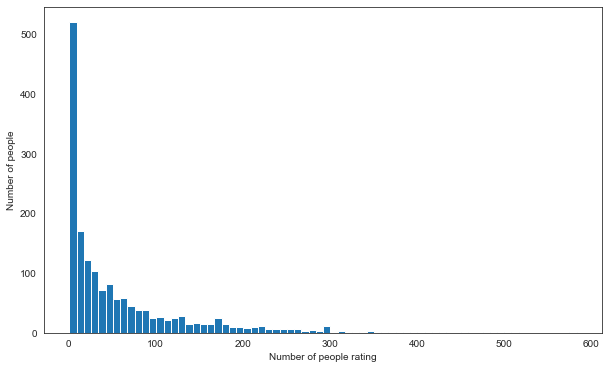

In [57]:
# Plot the histogram for number of rating

plt.figure(figsize=(10, 6))
plt.hist(rating['number of ratings'], bins = 70)
plt.xlabel("Number of people rating")
plt.ylabel("Number of people")
plt.show();

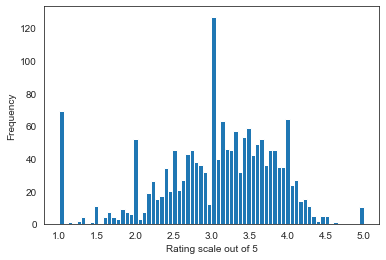

In [59]:
# Plot histogram of ratings
plt.hist(rating['rating'], bins = 70)
plt.xlabel("Rating scale out of 5")
plt.ylabel("Frequency")
plt.show()

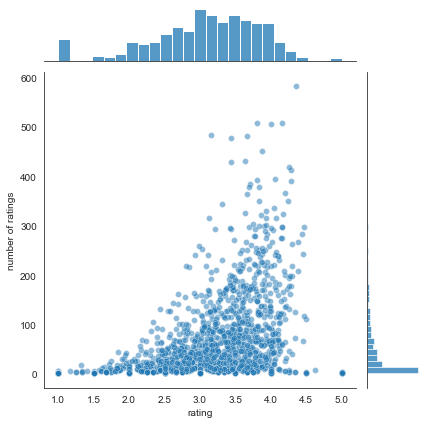

In [60]:
# Joing plot between no of rating and actual rating

sns.jointplot(x = 'rating', y = 'number of ratings' ,data=rating, alpha = 0.5)